In [ ]:
'''
GeneralNeuron:
        |
        |----------Sensory Neuron:
        |                |-----------Photoreceptor
        |                |-----------Mechanoreceptor
        |
        |
        |----------Motor Neuron:
|                       |-----------Alpha Motor Neuron
|                       |-----------Gamma Motor Neuron
|
 '''

In [ ]:

pip install numpy matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Base class
class GeneralNeuron:
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate

    def activate(self, stimulus_strength):
        pass

#intermediate class 
class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

    def sense_stimulus(self):
        pass

class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    def control_muscle(self):
        pass


# Leaf classes
class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="light")

    def light_detection(self, light_intensity):
        pass



class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="pressure")

    def pressure_detection(self, pressure):
        pass

class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    def skeletal_muscle_control(self, activation_level):
        pass

class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="muscle spindle")

    def muscle_spindle_control(self, activation_level):
        pass


In [1]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def sin_sample(signal):
    # Compute the first derivative
    derivative = np.diff(signal)
    # Find indices where the derivative changes sign
    maxima_indices = np.where((derivative[:-1] > 0) & (derivative[1:] <= 0))[0] + 1
    minima_indices = np.where((derivative[:-1] < 0) & (derivative[1:] >= 0))[0] + 1

    # saving np array of maximal minimal points 
    maxima = signal[maxima_indices]
    minima = signal[minima_indices]

    #save every 5th point to reduce the signal
    every5th_indices = np.arange(0, len(signal), 5)

    #saving every 5th element plus the minima and maxima points, making sure every point in the graph is 
    # saved exactly once using the unique function. 
    all_indices = np.unique(np.concatenate((every5th_indices, maxima_indices, minima_indices)))  

    #returning the new array 
    return signal[all_indices], all_indices


Downsized Signal: <method-wrapper '__len__' of numpy.ndarray object at 0x000001CEB501B4B0>
Original Signal: <method-wrapper '__len__' of numpy.ndarray object at 0x000001CEB626AEB0>


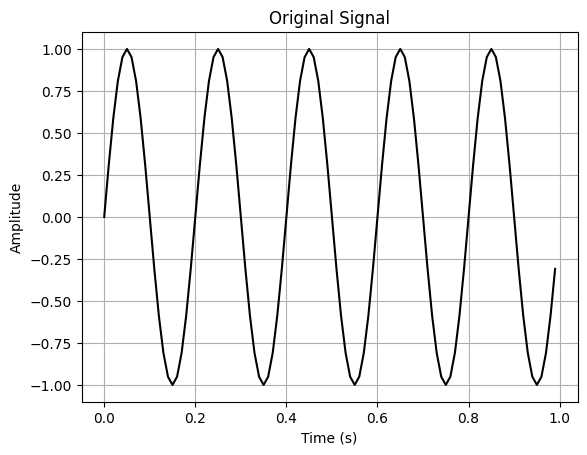

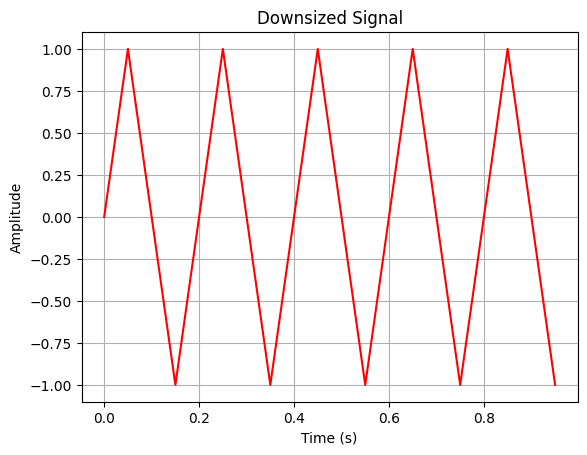

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a 5Hz sinusoidal signal sampled every 0.01 seconds
t = np.arange(0, 1, 0.01)  # Time array (10 seconds)
signal = np.sin(2 * np.pi * 5 * t)  # 5Hz sinusoidal signal

downsized_signal, indices = sin_sample(signal)

# Step 3: Print the downsized signal
print("Downsized Signal:", downsized_signal.__len__)
print("Original Signal:", signal.__len__)


plt.figure(figsize=(10, 5))
plt.plot(t, signal, label='Original Signal', color='black')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t[indices], downsized_signal, color='red', label='Downsized Signal')
plt.title('Downsized Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()